# Dataset Introduction

The [covid_19 dataset](https://drive.google.com/file/d/1BTG4tZUmiTKwu1E7o_UmqAtMrguNrOoh/view) is a small dataset that covers 19,000 covid cases.

187 regions are represented in this data.

All of countries have records dating on 29 April 2020.

**Summary Data Columns Description:**
* **Date**: designates the date of observation of the row's data in MM-DD-YYYY format.
* **Region**: designates the Country in which the the row's data was observed.
* **State**: designate the state in which the the row's data was observed.
* **Confirmed**: designates the total number of confirmed cases in the observed region.
* **Deaths**: designates the total number of confirmed deaths in the observed region.
* **Recovered**: designates the total number of confirmed recoveries in the observed region.

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
data = pd.read_csv (r'C:\Users\yesmi\OneDrive\Desktop\Data Analytics Projects\Projects Set 1\covid_19_data.csv')

In [26]:
data.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [27]:
data.shape

(321, 6)

In [28]:
data.Region.nunique()

187

In [29]:
data.Region.value_counts()

US                58
Mainland China    31
Canada            15
France            11
UK                11
                  ..
Guinea             1
Guinea-Bissau      1
Guyana             1
Haiti              1
Macau              1
Name: Region, Length: 187, dtype: int64

# Missing Values

In [30]:
data.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

<AxesSubplot:>

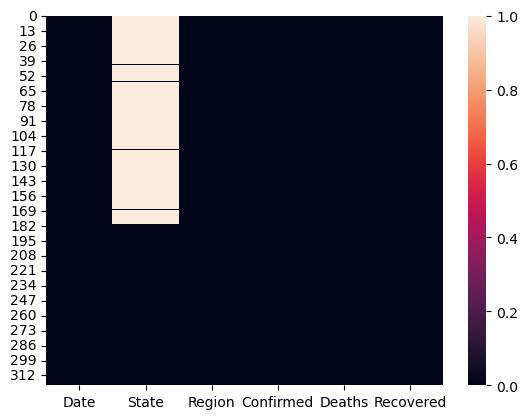

In [40]:
#use heatmap to identify pattern in missing state values
sns.heatmap(data.isnull())

# Number of Confirmed, Deaths, and Recovered in Each Region

In [41]:
data.groupby('Region').Confirmed.sum().sort_values(ascending=True)

Region
Yemen                          6
Western Sahara                 6
Bhutan                         7
Papua New Guinea               8
Sao Tome and Principe          8
                          ...   
UK                        166441
France                    166543
Italy                     203591
Spain                     236899
US                       1039909
Name: Confirmed, Length: 187, dtype: int64

In [37]:
data.groupby('Region').Deaths.sum()

Region
Afghanistan            60
Albania                30
Algeria               444
Andorra                42
Angola                  2
                     ... 
West Bank and Gaza      2
Western Sahara          0
Yemen                   0
Zambia                  3
Zimbabwe                4
Name: Deaths, Length: 187, dtype: int64

In [69]:
data.groupby('Region').Recovered.sum().sort_values(ascending=True)

Region
US                     0
Canada                 0
South Sudan            0
Cabo Verde             2
Holy See               2
                   ...  
Italy              71252
Iran               73791
Mainland China     77609
Germany           120400
Spain             132929
Name: Recovered, Length: 180, dtype: int64

# Remove all Records where the Confirmed Cases is Less Than 10.

In [52]:
data = data[~(data.Confirmed < 10)]

In [53]:
data[data.Confirmed < 10]

,Date,State,Region,Confirmed,Deaths,Recovered


# Region with

In [59]:
# Maximum Number of Confirmed Cases
data.groupby('Region').Confirmed.sum().sort_values(ascending=False)

Region
US            1039909
Spain          236899
Italy          203591
France         166536
UK             166432
               ...   
Seychelles         11
Burundi            11
Suriname           10
Gambia             10
Holy See           10
Name: Confirmed, Length: 180, dtype: int64

In [61]:
# Minimum number of death Cases
data.groupby('Region').Deaths.sum().sort_values(ascending=True)

Region
Cambodia                        0
Seychelles                      0
Saint Lucia                     0
Central African Republic        0
Saint Kitts and Nevis           0
                            ...  
France                      24121
Spain                       24275
UK                          26165
Italy                       27682
US                          60967
Name: Deaths, Length: 180, dtype: int64

# How many Confirmed, Deaths & Recovered cases were reported from the US?

In [71]:
data[data.Region=='US'].head()

,Date,State,Region,Confirmed,Deaths,Recovered
181,4/29/2020,Alabama,US,6912,256,0
182,4/29/2020,Alaska,US,355,9,0
186,4/29/2020,Arizona,US,7209,308,0
187,4/29/2020,Arkansas,US,3193,57,0
195,4/29/2020,California,US,48747,1946,0


In [73]:
print("Total number of deaths in the US: ",data[data['Region']=='US']['Deaths'].sum())

Total number of deaths in the US:  60967


In [67]:
print("Total number of confirmed cases in the US: ",data[data['Region']=='US']['Confirmed'].sum())

Total number of confirmed cases in the US:  1039909


In [68]:
print("Total number of revovered cases in the US: ",data[data['Region']=='US']['Recovered'].sum())

Total number of revovered cases in the US:  0


# Sort Confirmed Cases in Ascending Order

In [79]:
data.sort_values(by=['Confirmed'],ascending=True)

,Date,State,Region,Confirmed,Deaths,Recovered
156,4/29/2020,NaN,Suriname,10,1,8
70,4/29/2020,NaN,Holy See,10,0,2
59,4/29/2020,NaN,Gambia,10,1,8
318,4/29/2020,Yukon,Canada,11,0,0
217,4/29/2020,Greenland,Denmark,11,0,11
...,...,...,...,...,...,...
57,4/29/2020,French Guiana,France,165093,24087,48228
168,4/29/2020,Anguilla,UK,165221,26097,0
80,4/29/2020,NaN,Italy,203591,27682,71252
153,4/29/2020,NaN,Spain,236899,24275,132929


In [81]:
#sort by recovered cases in descending order
data.sort_values(by=['Recovered'],ascending=False)

,Date,State,Region,Confirmed,Deaths,Recovered
153,4/29/2020,NaN,Spain,236899,24275,132929
61,4/29/2020,NaN,Germany,161539,6467,120400
76,4/29/2020,NaN,Iran,93657,5957,73791
80,4/29/2020,NaN,Italy,203591,27682,71252
229,4/29/2020,Hubei,Mainland China,68128,4512,63616
...,...,...,...,...,...,...
258,4/29/2020,Nevada,US,4934,230,0
257,4/29/2020,Nebraska,US,3851,56,0
255,4/29/2020,Montana,US,451,16,0
254,4/29/2020,Missouri,US,7660,338,0
